In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from __future__ import absolute_import
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader.data import DataReader 
import matplotlib.pyplot as plt
from numpy import loadtxt, where
%matplotlib notebook

In [2]:
end = dt.datetime.now()
start = end - dt.timedelta (days = 5 * 356)

In [3]:
df = DataReader("MU","iex",start, end)

5y


In [4]:
#df.reset_index(inplace = True)

In [5]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
df['year'] = df.index.year.values
df['month'] = df.index.month.values
df['day'] = df.index.day.values


In [6]:
df.head()

,open,high,low,close,volume,year,month,day
date,,,,,,,,
2013-11-12,18.17,18.67,18.12,18.630,32232323,2013,11,12
2013-11-13,18.47,18.99,18.42,18.920,38821218,2013,11,13
2013-11-14,18.91,19.20,18.90,19.190,31417954,2013,11,14
2013-11-15,19.38,19.83,19.22,19.461,51592829,2013,11,15
2013-11-18,19.58,19.88,19.09,19.290,47549892,2013,11,18


In [7]:
#print(year)
df['date'] = df['year'].astype(str)+ '-' +df['month'].astype(str) + '-' + df['day'].astype(str)

#df['date'] = pd.to_datetime(df[['year', 'month','day']])
df.date.values

array(['2013-11-12', '2013-11-13', '2013-11-14', ..., '2018-9-21',
       '2018-9-24', '2018-9-25'], dtype=object)

In [8]:
df.tail()

,open,high,low,close,volume,year,month,day,date
date,,,,,,,,,
2018-09-19,45.78,46.0600,44.84,45.06,29264655,2018,9,19,2018-9-19
2018-09-20,46.40,47.2199,45.91,46.06,75144122,2018,9,20,2018-9-20
2018-09-21,44.40,45.6000,43.80,44.74,97053409,2018,9,21,2018-9-21
2018-09-24,44.20,45.6500,43.86,45.16,36918937,2018,9,24,2018-9-24
2018-09-25,45.10,45.4606,44.02,44.64,32547450,2018,9,25,2018-9-25


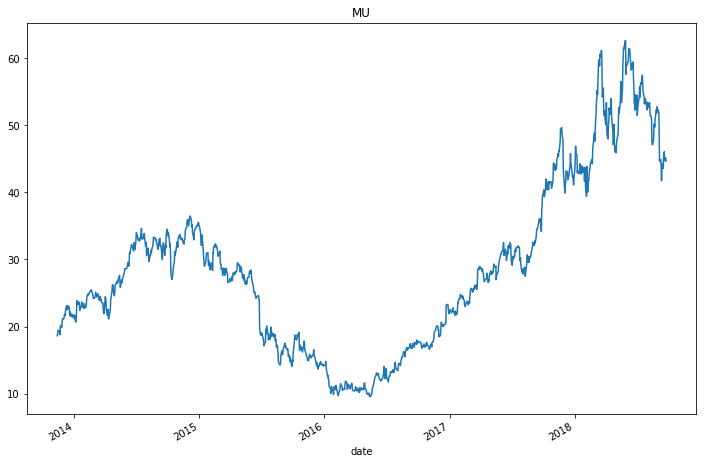

In [9]:
df.close.plot(figsize=(12,8), title='MU')

In [10]:
#for i, (index, row) in enumerate(df.iterrows()):
        #print (row)
    #print( df.loc[df.index[ i - 4 ], 'close'])
    #df.at[index,'Momentum_function']

In [11]:
#Selected technical indicators and their formulas (Type 1).
#Stochastic %K
lowest = df['low'].rolling(window=4).min()
df['Stochastic_k'] = pd.Series((df['close'] - lowest)) / (df['high'] - lowest)

In [12]:
#Calculating in two different ways
def count_momentum(dataFrame, periods, column_close='close'):
    dataFrame['Momentum'] = np.nan
    for i, (index, row) in enumerate(df.iterrows()):
        if i >= periods:
            previous_value = df.loc[df.index[i-periods], column_close]
            current_value = df.loc[df.index[i], column_close]
            final_value = (current_value - previous_value)
            dataFrame.at[index, 'Momentum'] = final_value

    return dataFrame


df['Momentum_function'] = df.close - df.close.shift(4)
#df['Momentum_Test'] = pd.Series(df['close'].diff(4))

In [13]:
#ROC (rate of change)	Ct/C(t−n) × 100,
def ROC(dataFrame, periods, column_close='close'):
    dataFrame['ROC'] = np.nan
    for i, (index, row) in enumerate(df.iterrows()):
        if i >= periods :
            momentum = dataFrame.at[index,'Momentum']
            shift_value = df.loc[df.index[ i - periods ], column_close]
            ROC = momentum / shift_value
            dataFrame.at[index, 'ROC'] = ROC

    return dataFrame


df['ROC_function'] = pd.Series(df['close'].diff(4)/df['close'].shift(4))
#df['ROC_Test2'] = df.close.pct_change(4)

In [14]:
count_momentum(df,4)
ROC(df, 4)
df.head()

,open,high,low,close,volume,year,month,day,date,Stochastic_k,Momentum_function,ROC_function,Momentum,ROC
date,,,,,,,,,,,,,,
2013-11-12,18.17,18.67,18.12,18.630,32232323,2013,11,12,2013-11-12,NaN,NaN,NaN,NaN,NaN
2013-11-13,18.47,18.99,18.42,18.920,38821218,2013,11,13,2013-11-13,NaN,NaN,NaN,NaN,NaN
2013-11-14,18.91,19.20,18.90,19.190,31417954,2013,11,14,2013-11-14,NaN,NaN,NaN,NaN,NaN
2013-11-15,19.38,19.83,19.22,19.461,51592829,2013,11,15,2013-11-15,0.784211,NaN,NaN,NaN,NaN
2013-11-18,19.58,19.88,19.09,19.290,47549892,2013,11,18,2013-11-18,0.595890,0.66,0.035427,0.66,0.035427


In [15]:
#count_ROC(df,5)
#def count_ROC(dataFrame, numberOfDays):
    #dataFrame['ROC_Test1'] = pd.Series(dataFrame['close'].diff(numberOfDays - 1) / 
                    #dataFrame['close'].shift(numberOfDays - 1), )
    #return dataFrame.ROC_Test1
#https://www.youtube.com/watch?v=4AMGMWQosps
#previous_value = df.loc[df.index[i-periods], column_close] 
#current_value = df.loc[df.index[i], column_close] 
#momentum = (current_value - previous_value)

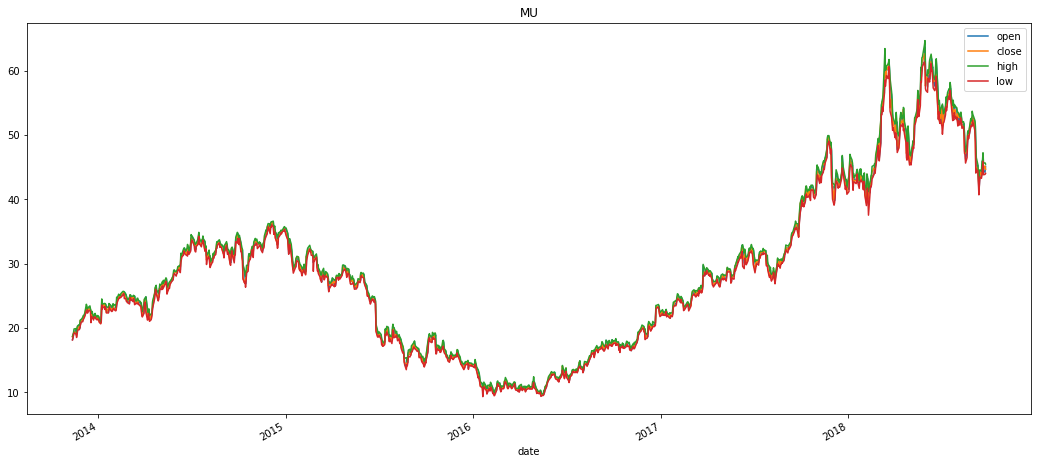

In [16]:
df[['open','close', 'high', 'low']].plot(figsize=(18,8), title='MU')

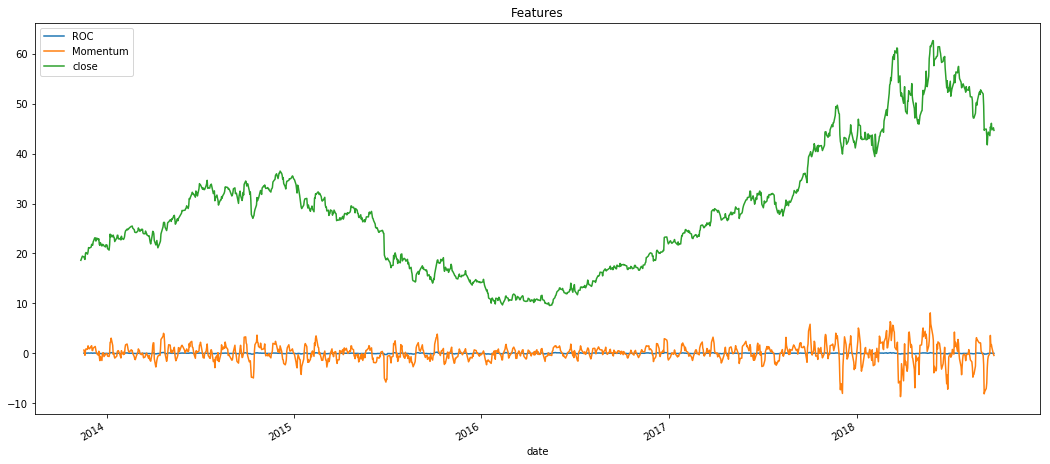

In [17]:
#Step 2 - implement 2 features and visualize the price and the features in the same graph
df[['ROC', 'Momentum','close']].plot(figsize=(18,8), title='Features')

In [18]:
#Step 5 - add 2 more features from the “Type 2” category of features presented in the paper
#Selected technical indicators and their formulas (Type 2).

#BIAS6
MA6 = df['close'].rolling(6, min_periods=4).mean()
df['BIAS6'] = pd.Series((df['close']- MA6) / MA6)

In [19]:
#https://www.investopedia.com/terms/o/onbalancevolume.asp
def count_OBV(dataFrame):
    column_volume='volume'
    column_close='close'
    for i, (index, row) in enumerate(df.iterrows()):
        if i > 0:
            previous_OBV = dataFrame.loc[dataFrame.index[i-1], 'OBV']
            if row[column_close] > dataFrame.loc[dataFrame.index[i-1], column_close]:
                current_OBV = previous_OBV + row[column_volume]
            elif row[column_close] < dataFrame.loc[dataFrame.index[i-1], column_close]:
                current_OBV = previous_OBV - row[column_volume]
            else:
                current_OBV = previous_OBV
        else:
            previous_OBV = 0
            current_OBV = row[column_volume]

        dataFrame.at[index, 'OBV'] =  current_OBV

    return dataFrame

count_OBV(df)

,open,high,low,close,volume,year,month,day,date,Stochastic_k,Momentum_function,ROC_function,Momentum,ROC,BIAS6,OBV
date,,,,,,,,,,,,,,,,
2013-11-12,18.170,18.6700,18.1200,18.630,32232323,2013,11,12,2013-11-12,NaN,NaN,NaN,NaN,NaN,NaN,3.223232e+07
2013-11-13,18.470,18.9900,18.4200,18.920,38821218,2013,11,13,2013-11-13,NaN,NaN,NaN,NaN,NaN,NaN,7.105354e+07
2013-11-14,18.910,19.2000,18.9000,19.190,31417954,2013,11,14,2013-11-14,NaN,NaN,NaN,NaN,NaN,NaN,1.024715e+08
2013-11-15,19.380,19.8300,19.2200,19.461,51592829,2013,11,15,2013-11-15,0.784211,NaN,NaN,NaN,NaN,0.021561,1.540643e+08
2013-11-18,19.580,19.8800,19.0900,19.290,47549892,2013,11,18,2013-11-18,0.595890,0.660,0.035427,0.660,0.035427,0.010043,1.065144e+08
2013-11-19,19.350,19.8700,19.0500,19.060,51853726,2013,11,19,2013-11-19,0.164948,0.140,0.007400,0.140,0.007400,-0.001667,5.466071e+07
2013-11-20,19.190,19.2200,18.5100,18.800,44815768,2013,11,20,2013-11-20,0.408451,-0.390,-0.020323,-0.390,-0.020323,-0.016745,9.844938e+06
2013-11-21,19.040,20.1150,18.9600,19.990,93347344,2013,11,21,2013-11-21,0.922118,0.529,0.027183,0.529,0.027183,0.035832,1.031923e+08
2013-11-22,19.910,20.3200,19.6600,20.190,40144827,2013,11,22,2013-11-22,0.928177,0.900,0.046656,0.900,0.046656,0.037237,1.433371e+08


In [47]:
#MA5	MA5=(∑5i=1Ct−i+1)/5
def count_moving_average(dataFrame, periods, column_close='close'):
    dataFrame['MA_function'] = np.nan
    for i, (index, row) in enumerate(df.iterrows()):
        if i >= periods - 1:
            sum = 0
            for j in range(periods):
                sum += df.loc[df.index[ i - j  ], column_close]     
            ma_value = sum/periods              
            dataFrame.at[index, 'MA_function'] = ma_value

    return dataFrame
count_moving_average(df,5)

df['Moving_Average_5'] = pd.Series(df['close'].rolling(5, min_periods=5).mean())
df.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,open,high,low,close,volume,year,month,day,date,Stochastic_k,Momentum_function,ROC_function,Momentum,ROC,BIAS6,OBV,MA_function,Moving_Average_5,label
date,,,,,,,,,,,,,,,,,,,
2013-11-18,19.58,19.880,19.0900,19.29,47549892,2013,11,18,2013-11-18,0.595890,0.660,0.035427,0.660,0.035427,0.010043,106514432.0,NaN,NaN,19.06
2013-11-19,19.35,19.870,19.0500,19.06,51853726,2013,11,19,2013-11-19,0.164948,0.140,0.007400,0.140,0.007400,-0.001667,54660706.0,NaN,NaN,18.80
2013-11-20,19.19,19.220,18.5100,18.80,44815768,2013,11,20,2013-11-20,0.408451,-0.390,-0.020323,-0.390,-0.020323,-0.016745,9844938.0,NaN,NaN,19.99
2013-11-21,19.04,20.115,18.9600,19.99,93347344,2013,11,21,2013-11-21,0.922118,0.529,0.027183,0.529,0.027183,0.035832,103192282.0,NaN,NaN,20.19
2013-11-22,19.91,20.320,19.6600,20.19,40144827,2013,11,22,2013-11-22,0.928177,0.900,0.046656,0.900,0.046656,0.037237,143337109.0,19.466,19.466,19.86
2013-11-25,20.44,20.500,19.7104,19.86,33875466,2013,11,25,2013-11-25,0.678392,0.800,0.041973,0.800,0.041973,0.016810,109461643.0,19.580,19.580,20.31
2013-11-26,19.93,20.410,19.8300,20.31,33585049,2013,11,26,2013-11-26,0.931034,1.510,0.080319,1.510,0.080319,0.030877,143046692.0,19.830,19.830,21.17
2013-11-27,20.41,21.190,20.2900,21.17,40572662,2013,11,27,2013-11-27,0.986928,1.180,0.059030,1.180,0.059030,0.055685,183619354.0,20.304,20.304,21.10
2013-11-29,21.30,21.310,20.9000,21.10,20081775,2013,11,29,2013-11-29,0.868717,0.910,0.045072,0.910,0.045072,0.032458,163537579.0,20.526,20.526,21.27


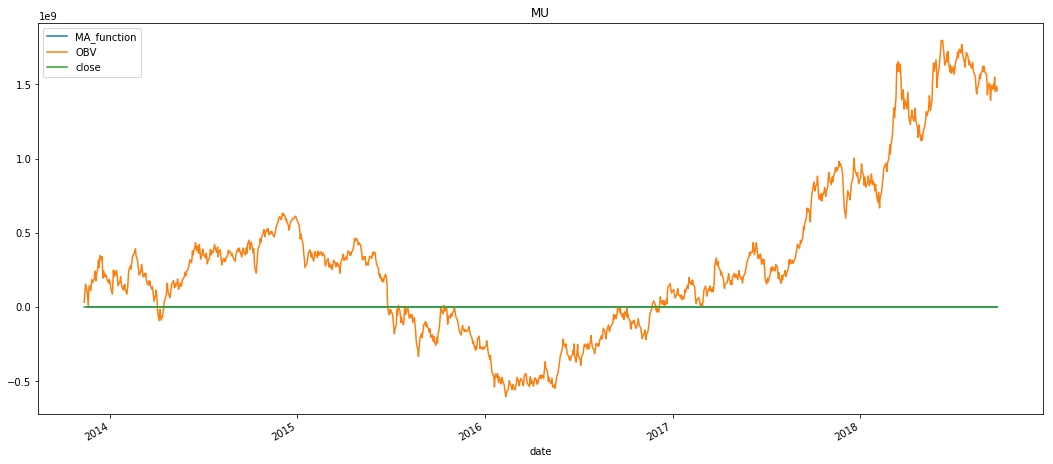

In [21]:
df[['MA_function','OBV', 'close']].plot(figsize=(18,8), title='MU')

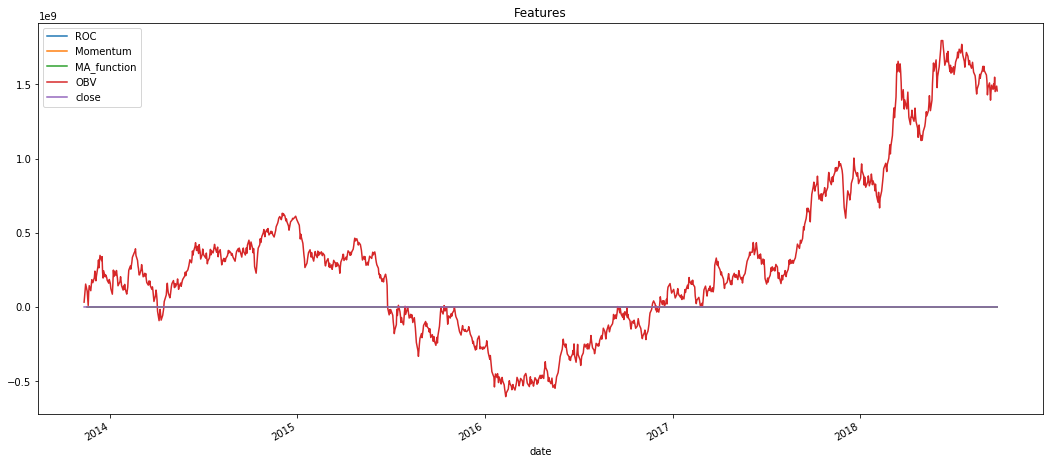

In [22]:
df[['ROC', 'Momentum','MA_function','OBV', 'close']].plot(figsize=(18,8), title='Features')

In [23]:
df['label'] = df.close.shift(-1)
df = df.dropna()

In [24]:
df.head()

,open,high,low,close,volume,year,month,day,date,Stochastic_k,Momentum_function,ROC_function,Momentum,ROC,BIAS6,OBV,MA_function,Moving_Average_5,label
date,,,,,,,,,,,,,,,,,,,
2013-11-18,19.58,19.880,19.09,19.29,47549892,2013,11,18,2013-11-18,0.595890,0.660,0.035427,0.660,0.035427,0.010043,106514432.0,19.0982,19.0982,19.06
2013-11-19,19.35,19.870,19.05,19.06,51853726,2013,11,19,2013-11-19,0.164948,0.140,0.007400,0.140,0.007400,-0.001667,54660706.0,19.1842,19.1842,18.80
2013-11-20,19.19,19.220,18.51,18.80,44815768,2013,11,20,2013-11-20,0.408451,-0.390,-0.020323,-0.390,-0.020323,-0.016745,9844938.0,19.1602,19.1602,19.99
2013-11-21,19.04,20.115,18.96,19.99,93347344,2013,11,21,2013-11-21,0.922118,0.529,0.027183,0.529,0.027183,0.035832,103192282.0,19.3202,19.3202,20.19
2013-11-22,19.91,20.320,19.66,20.19,40144827,2013,11,22,2013-11-22,0.928177,0.900,0.046656,0.900,0.046656,0.037237,143337109.0,19.4660,19.4660,19.86


In [25]:
#%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, ElasticNetCV,Ridge
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model



X = np.array(df[['ROC','Momentum','close']])
Y = np.array(df.label)
Y = Y.reshape(-1,1)

#X = np.nan_to_num(X)
#Y = np.nan_to_num(Y)
#scaler = preprocessing.StandardScaler().fit(Y)
#X = scaler.transform(X)
#Y = scaler.transform(Y)

In [26]:
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.model_selection import train_test_split
import datetime

#train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#%time df['date'] = pd.to_datetime(df.index) 


tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    date_train, date_test = df.date[train_index], df.date[test_index]
    

In [27]:
#Use a linearmodel, seelinkfor moremodelsto test

linear = ElasticNetCV()
linear.fit(X_train, y_train.reshape(len(y_train),) )

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [28]:
#A simple score measure•
#Run your regression forecast
#Store your forecast values in an array
#y_test= np.nan_to_num(y_test)
linear.score(X_test, y_test)


0.937280364875975

In [29]:
print('Variance score: %.2f' % linear.score(X_test, y_test))

Variance score: 0.94


In [30]:
from sklearn.metrics import mean_squared_error
forcast_set = linear.predict(X_test)
# The coefficients
print('Coefficients:', linear.coef_)

# The mean square error
print("Residual sum of squares: %.2f" % np.mean((linear.predict(X_test) - y_test) ** 2))

print('Mean squared error: ',mean_squared_error(forcast_set,y_test ))

Coefficients: [0.         0.         0.99676512]
Residual sum of squares: 72.68
Mean squared error:  2.274928107730351


<IPython.core.display.Javascript object>


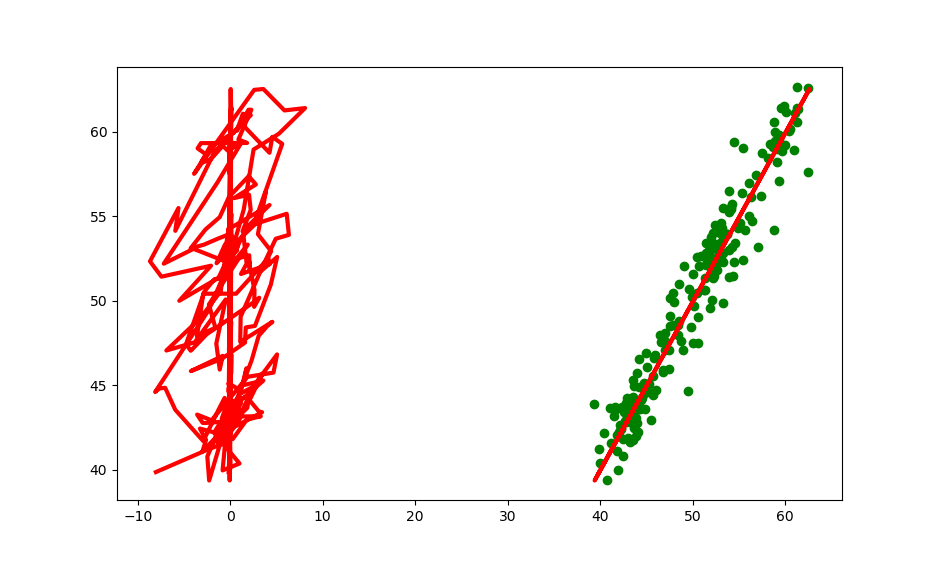

In [46]:
# Plot outputs
from pylab import *
%matplotlib notebook
#fig, ax = plt.subplots()
#ax.set_ylim(0,y_test.max())
#ax.set_xlim(0,y_test.max())

plt.scatter(forcast_set, y_test,  color='g')        
#plt.plot(np.sort(X_test[:,0], axis=0), forcast_set, color='black', linewidth=3)
#plt.plot(np.sort(X_test, axis=0), forcast_set, color='red', linewidth=3)
plt.plot(X_test, forcast_set, color='red', linewidth=3)
plt.show()

In [32]:
dataFrame = pd.DataFrame({'Actual':y_test.ravel(),'Predicted':forcast_set, 'date':date_test})
#%time dataFrame ['date'] = pd.to_datetime(date_test.values)

<IPython.core.display.Javascript object>


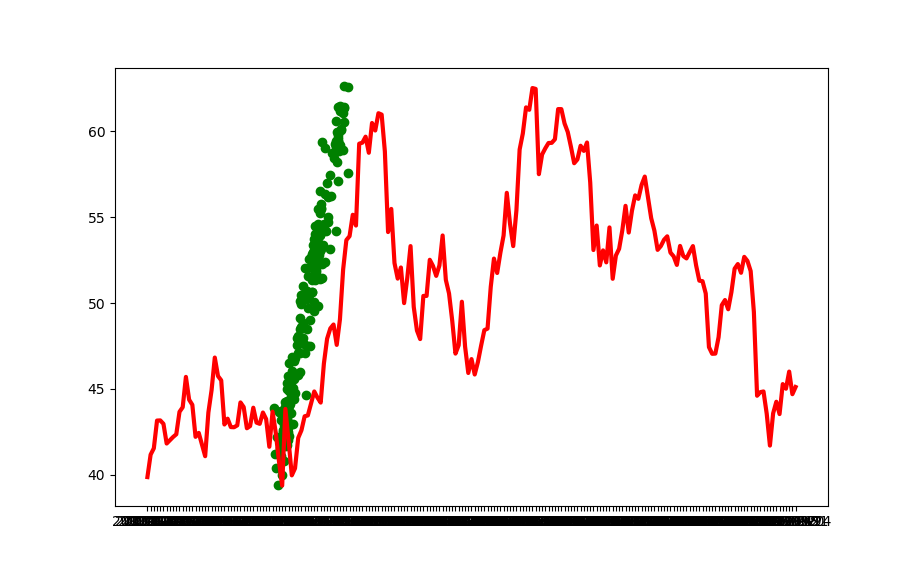

In [45]:
# Plot outputs
from pylab import *
%matplotlib notebook
#fig, ax = plt.subplots()
#ax.set_ylim(0,y_test.max())
#ax.set_xlim(0,y_test.max())
#print(date_test.values)
#plt.plot(np.sort(X_test[:,0], axis=0), forcast_set, color='black', linewidth=3)
#date_test = matplotlib.dates.date2num(date_test)

plt.scatter(forcast_set, y_test,  color='g')

#%time data [date = pd.DataFrame (pd.to_datetime(date_test))

plt.plot(dataFrame.date, dataFrame.Predicted, color='red', linewidth=3)


plt.show()

#view limit minimum -36806.770608854764 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [34]:
forcast_set[:5]

array([39.86886955, 41.17463185, 41.54343495, 43.15819443, 43.16816208])

In [35]:
y_train[:5]

array([[19.06],
       [18.8 ],
       [19.99],
       [20.19],
       [19.86]])

In [36]:
#Step 5 - adding 2 more features from the “Type 2” category of features presented in the paper

In [37]:
y_test[:5]

array([[41.21],
       [41.58],
       [43.2 ],
       [43.21],
       [43.01]])

In [38]:
print(y_test.ravel()[:5])

[41.21 41.58 43.2  43.21 43.01]


In [39]:
dataFrame.head()

,Actual,Predicted,date
date,,,
2017-12-04,41.21,39.868870,2017-12-4
2017-12-05,41.58,41.174632,2017-12-5
2017-12-06,43.20,41.543435,2017-12-6
2017-12-07,43.21,43.158194,2017-12-7
2017-12-08,43.01,43.168162,2017-12-8


In [40]:
#Just a test
for index, row in dataFrame.iterrows():
    if dataFrame.at[index, 'Actual'] <= 0:
        print(dataFrame.at[index, 'Actual'])
        print(index)
    elif dataFrame.at[index, 'Predicted'] <= 0:
        print(dataFrame.at[index, 'Predicted'])
        print(index)

,Actual,Predicted,date,Predicted_UP_DOWN,Actual_UP_DOWN,Decision,Predicted-Actual
date,,,,,,,
2017-12-04,41.21,39.868870,2017-12-4,DOWN,UP,Sell,-1.341130
2017-12-05,41.58,41.174632,2017-12-5,DOWN,UP,Sell,-0.405368
2017-12-06,43.20,41.543435,2017-12-6,DOWN,UP,Sell,-1.656565
2017-12-07,43.21,43.158194,2017-12-7,DOWN,UP,Sell,-0.051806
2017-12-08,43.01,43.168162,2017-12-8,UP,DOWN,Buy,0.158162


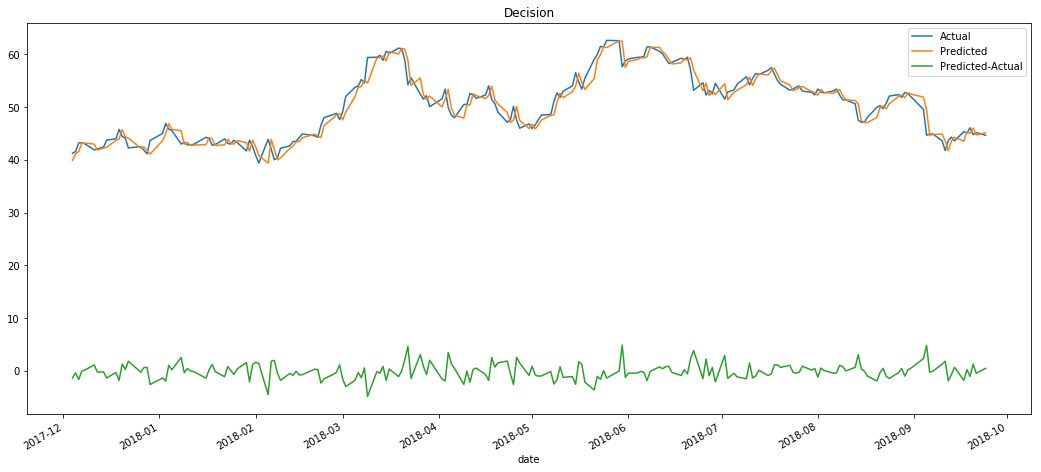

In [41]:
%matplotlib inline
def make_decision (dataFrame, column_actaul='Actual', column_predicted = 'Predicted'):
    Predicted_sub =[]
    Predicted_UP_DOWN =[]
    Actual_UP_DOWN =[]
    Dec =[]
    
    for index, row in dataFrame.iterrows():
        Predicted_Actual = dataFrame.at[index, 'Predicted'] - dataFrame.at[index, 'Actual']
        Predicted_sub.append (Predicted_Actual)
        
        #Actual_Output = dataFrame.at[index, 'Actual'] - dataFrame.at[index, 'Predicted']
        #Actual_sub.append (Actual_Output)
        
        if Predicted_Actual > 0:
            Predicted_UP_DOWN.append ("UP")
            Actual_UP_DOWN.append ("DOWN")
            Dec.append("Buy")
            
        elif Predicted_Actual < 0 :
            Predicted_UP_DOWN.append ("DOWN")
            Actual_UP_DOWN.append("UP")
            Dec.append("Sell")
        else:
            Predicted_UP_DOWN.append ("STABLE")
            Actual_UP_DOWN.append ("STABLE")
            Dec.append("Sell")
            
        
            
    dataFrame['Predicted_UP_DOWN'] = Predicted_UP_DOWN
    dataFrame['Actual_UP_DOWN'] = Actual_UP_DOWN
    dataFrame['Decision'] = Dec
    dataFrame['Predicted-Actual'] = Predicted_sub
    return dataFrame

make_decision(dataFrame)
dataFrame[['Actual','Predicted','Predicted-Actual','date']].plot(figsize=(18,8), title='Decision')
dataFrame.head()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a230f7048>,
      dtype=object)

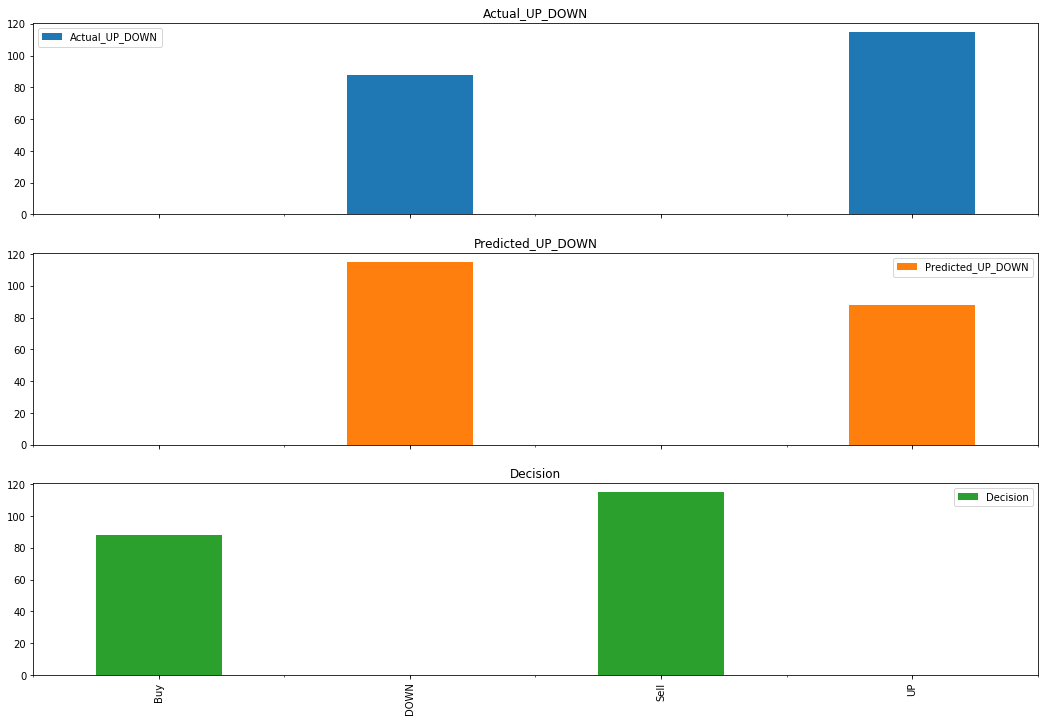

In [42]:
dataFrame[['Actual_UP_DOWN','Predicted_UP_DOWN','Decision']].apply(pd.value_counts).plot(kind='bar', figsize=(18,12),subplots=True)

In [43]:
#%time dataFrame['ts'] = pd.to_datetime(dataFrame.date)
#dataFrame.apply(pd.value_counts).plot(kind='bar', subplots=True)
#dataFrame[['Actual_UP_DOWN','Predicted_UP_DOWN','Decision']].plot(x=dataFrame.index.values, kind="bar")

In [ ]:
%matplotlib inline
def make_decision (dataFrame, column_label='label', column_close = 'close'):
    decision =[]
    for i, (index, row) in enumerate(df.iterrows()):
        if row[column_label] > dataFrame.loc[dataFrame.index[i-1], column_close]:
            #print( dataFrame.loc[dataFrame.index[i-1], column_close])
            #print(i)
            decision.append( "Buy")
        elif row[column_label] < dataFrame.loc[dataFrame.index[i-1], column_close]:
            decision.append ("Sell")
            #print( dataFrame.loc[dataFrame.index[i-1], column_close])
            #print(i)
        else:
            decision.append ("Sell")

    dataFrame['Decision'] = decision
    return dataFrame
#df.Decision.value_counts().plot('bar', figsize=(18,8), title='Decision')